In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree

In [3]:
df = pd.read_csv("data/train1.csv")
df.head()

,ID,Age,Customer_Segment,Region,Preferred_Channel,Employment_Status,Annual_Income,Spending_Score,Savings_Amount,Loan_Amount,...,Customer_Tenure,Credit_Score,Avg_Transaction_Value,Num_Bounced_Checks,Account_Balance,Referral_Count,Loyalty_Score,Has_Credit_Card,Has_Loan,target
0,1,50,Gold,East,Phone,Self-Employed,46057.39,79,20265.32,19677.31,...,6,400.69,87.08,0,9896.39,6,6.0,0.0,1.0,0.0
1,2,60,Platinum,West,Branch,Self-Employed,52209.47,83,6997.78,42916.34,...,4,341.29,45.74,0,5602.75,3,2.0,1.0,0.0,1.0
2,3,69,Bronze,East,Online,Unemployed,67074.22,42,2684.09,29660.53,...,1,288.61,36.93,1,5736.54,2,10.0,0.0,0.0,1.0
3,4,36,Gold,West,Branch,Unemployed,81655.14,94,20754.05,15651.52,...,11,135.38,92.50,0,10768.90,0,6.0,1.0,1.0,1.0
4,5,47,Gold,West,Phone,Unemployed,52705.08,84,5071.86,22037.73,...,8,519.28,51.74,0,54.33,0,9.0,1.0,1.0,1.0


In [4]:
df.isnull().sum()

ID                        0
Age                       0
Customer_Segment          0
Region                    9
Preferred_Channel         9
Employment_Status         0
Annual_Income             0
Spending_Score            0
Savings_Amount            0
Loan_Amount              55
Years_with_Bank           0
Transaction_Count         0
Online_Purchases          0
In_Person_Purchases       0
Customer_Tenure           0
Credit_Score              0
Avg_Transaction_Value    11
Num_Bounced_Checks        0
Account_Balance          16
Referral_Count            0
Loyalty_Score            15
Has_Credit_Card          27
Has_Loan                 18
target                    4
dtype: int64

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [6]:
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [7]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
X = df.drop(["target", "ID"], axis=1)
y = df["target"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

In [13]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [14]:
y_pred = dt.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7104607721046077
Confusion Matrix:
 [[208 434]
 [ 31 933]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.32      0.47       642
         1.0       0.68      0.97      0.80       964

    accuracy                           0.71      1606
   macro avg       0.78      0.65      0.64      1606
weighted avg       0.76      0.71      0.67      1606



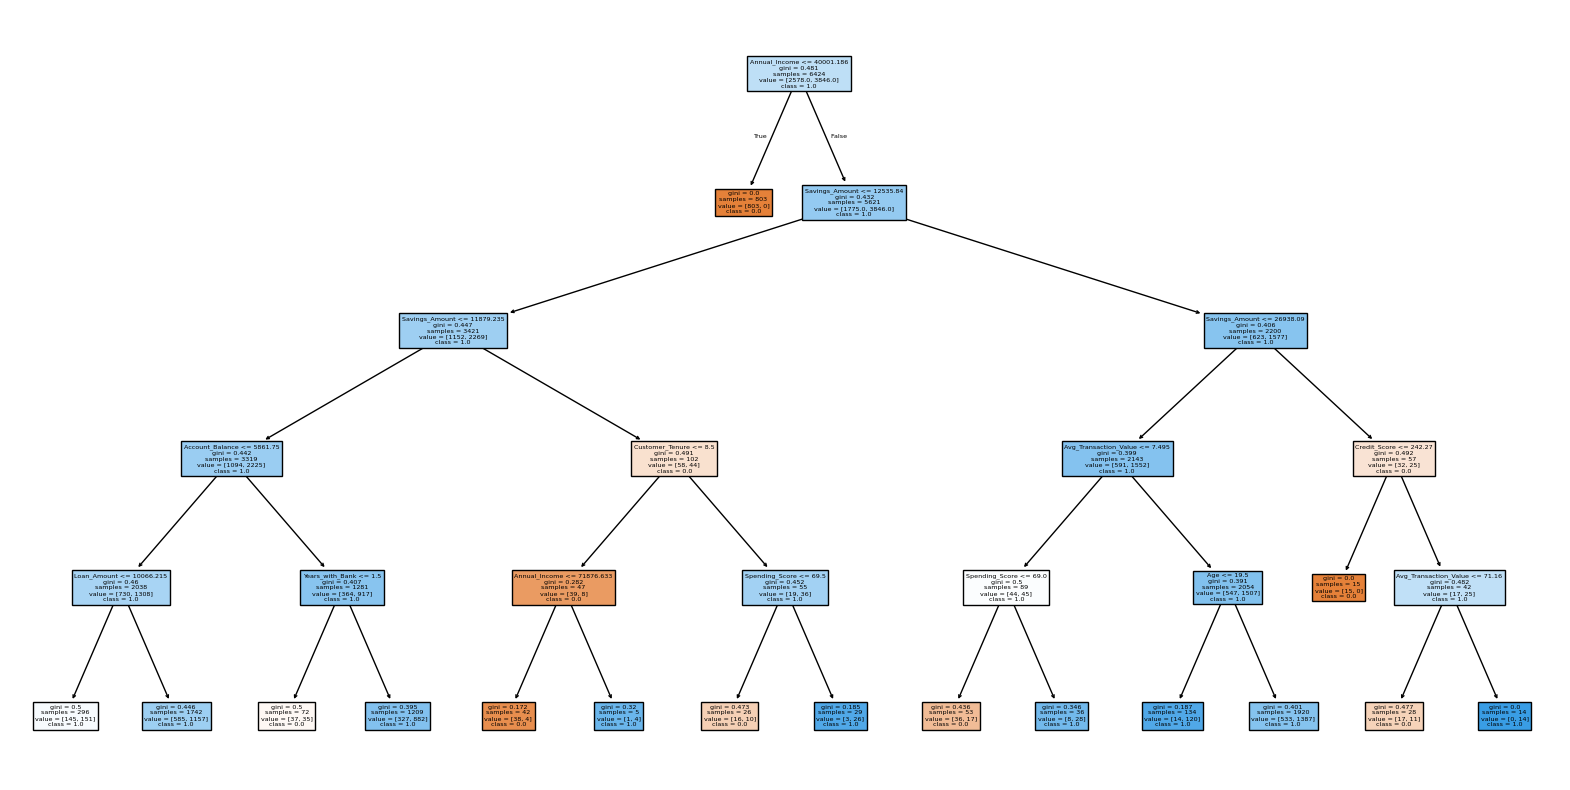

In [18]:
plt.figure(figsize=(20,10))
tree.plot_tree( dt, feature_names=X.columns, class_names=[str(c) for c in dt.classes_], filled=True )
plt.show()